# 5. Digital Filter Design and Analysis: Implementing FIR and IIR filters in Python. 6. Adaptive Filtering: Applying adaptive filtering algorithms to noise reduction.

## FIR implementation

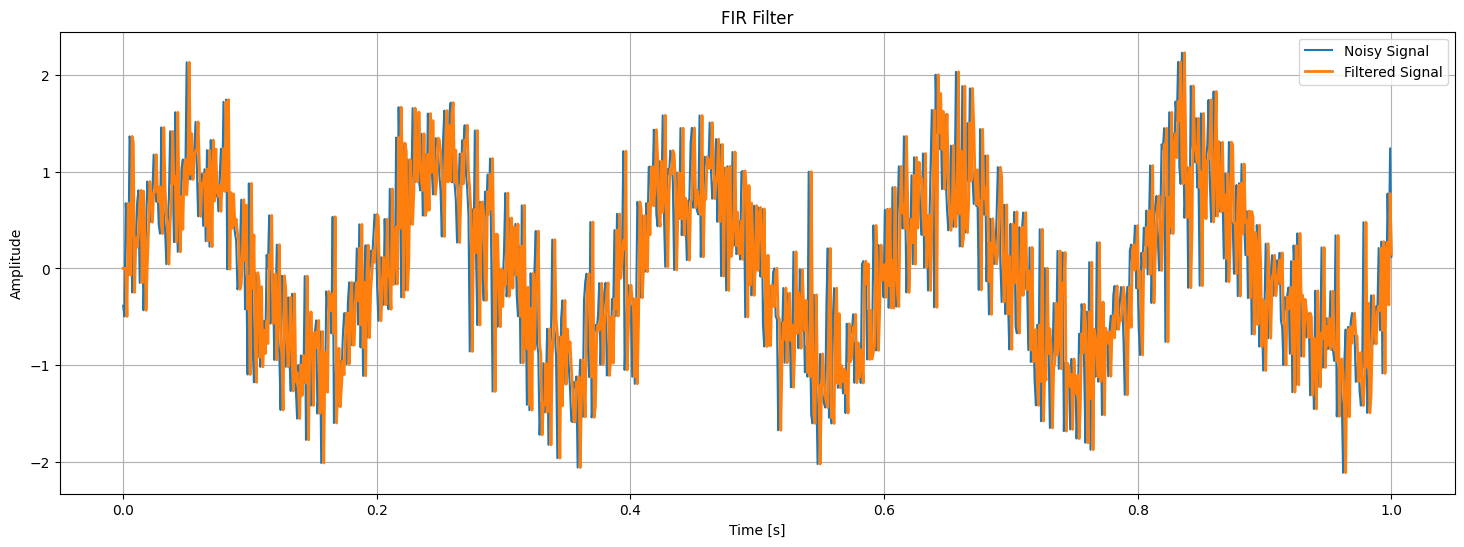

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fir_filter(x, b):
    """
    FIR filter implementation.
    
    Parameters:
    x : ndarray
        Input signal.
    b : ndarray
        Filter coefficients.
    
    Returns:
    y : ndarray
        Filtered output signal.
    """
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

# Example usage and plotting
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))  # Signal with noise
b = [0, 0, 1]  # FIR coefficients

y = fir_filter(x, b)

plt.figure(figsize=(18, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("FIR Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## FIR using scipy.signal library

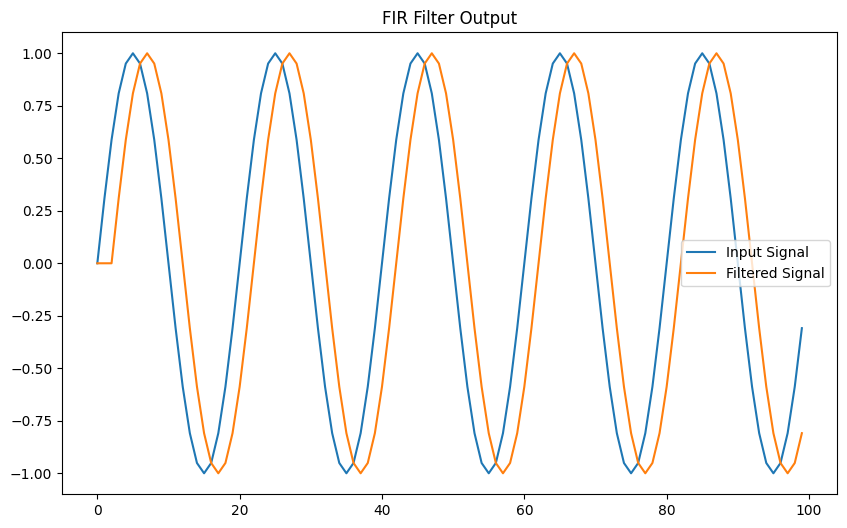

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Define FIR Filter
def fir_filter(b, x):
    M = len(b)  # Number of coefficients
    y = np.convolve(x, b, mode='full')[:len(x)]  # Apply filter
    return y

# Example FIR Coefficients and Input Signal
b = [0, 0, 1]  # FIR coefficients
x = np.sin(2 * np.pi * 0.05 * np.arange(100))  # Example input signal

# Filter the Signal
y = fir_filter(b, x)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, label="Input Signal")
plt.plot(y, label="Filtered Signal")
plt.legend()
plt.title("FIR Filter Output")
plt.show()


## IIR Filter implementation

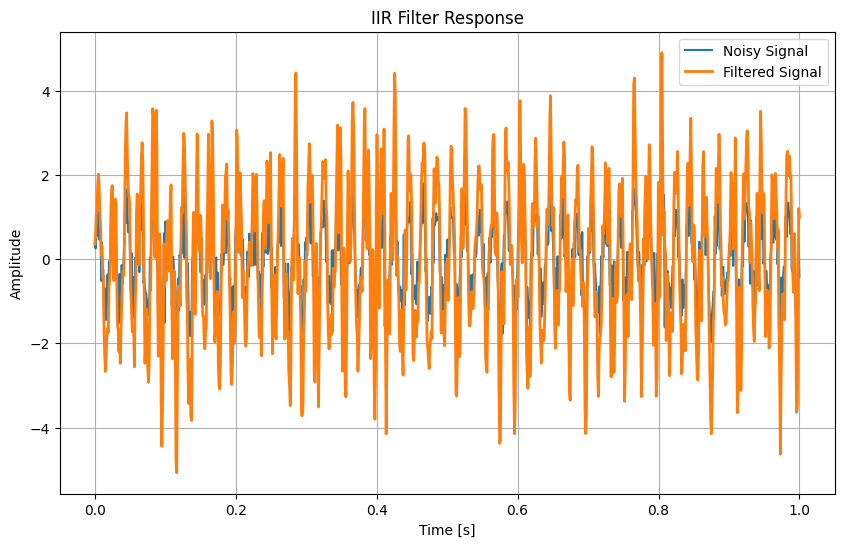

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def iir_filter(x, b, a):
    """
    IIR filter implementation.

    Parameters:
    x : ndarray
        Input signal.
    b : ndarray
        Numerator coefficients.
    a : ndarray
        Denominator coefficients.

    Returns:
    y : ndarray
        Filtered output signal.
    """
    M = len(b)  # Length of numerator coefficients (b)
    N = len(a)  # Length of denominator coefficients (a)
    y = np.zeros(len(x))  # Initialize output signal array

    # Apply filter to each sample in the input signal
    for n in range(len(x)):
        # Numerator part (feedforward)
        # Ensure we use the correct slice length for the convolution
        x_slice = x[max(0, n-M+1):n+1]  # Input signal slice
        y[n] = np.dot(b[:len(x_slice)], x_slice[::-1])  # Apply reverse convolution for numerator

        # Denominator part (feedback), skip the first sample
        if n >= 1:
            # Ensure we use the correct slice length for the feedback part
            y_slice = y[max(0, n-N+1):n]  # Output signal slice
            y[n] -= np.dot(a[1:min(N, len(y_slice)+1)], y_slice[::-1])  # Apply reverse convolution for feedback

    return y

# Example usage and plotting
# Create a noisy signal (for example, a sine wave with noise)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.random.randn(len(t))  # Noisy signal

# IIR filter coefficients
a = [1, -0.5, 0.7]  # Denominator coefficients (a_0 = 1 by convention)
b = [1, 0.5, 1]  # Numerator coefficients

# Apply the filter to the noisy signal
y = iir_filter(x, b, a)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Noisy Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("IIR Filter Response")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

## IIR implementation using scipy.signal

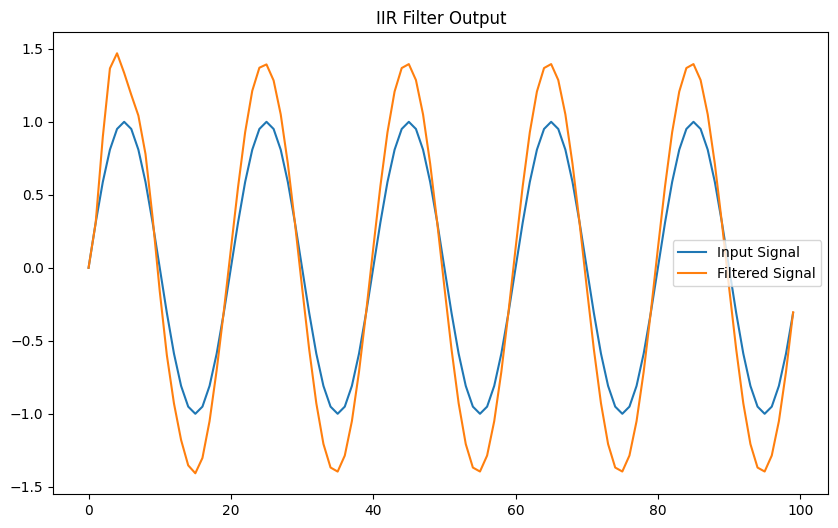

In [4]:
from scipy.signal import lfilter, freqz

# Define IIR Filter Coefficients
a = [1, -0.5, 0.7]  # Denominator
b = [1, 0.5, 0.1]  # Numerator

# Example Input Signal
x = np.sin(2 * np.pi * 0.05 * np.arange(100))

# Filter the Signal
y = lfilter(b, a, x)

# Plot the Output
plt.figure(figsize=(10, 6))
plt.plot(x, label="Input Signal")
plt.plot(y, label="Filtered Signal")
plt.legend()
plt.title("IIR Filter Output")
plt.show()


## Adaptive LMS Filter Implementation

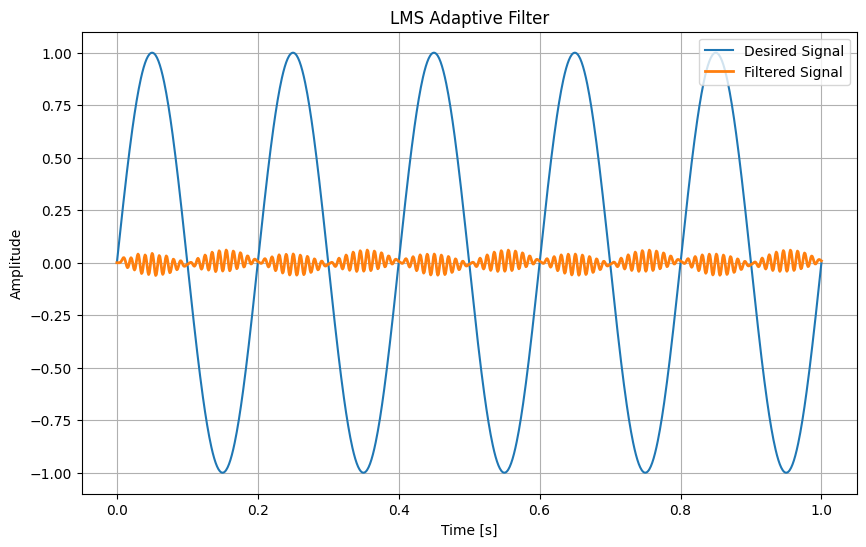

In [5]:
def lms_filter(x, d, mu, num_taps):
    """
    LMS adaptive filter implementation.
    
    Parameters:
    x : ndarray
        Input signal (noisy).
    d : ndarray
        Desired signal.
    mu : float
        Step size.
    num_taps : int
        Number of filter taps.
    
    Returns:
    y : ndarray
        Filtered output signal.
    e : ndarray
        Error signal.
    w : ndarray
        Final filter weights.
    """
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)

    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment
    
    return y, e, w

# Example usage and plotting
d = np.sin(2 * np.pi * 5 * t)  # Desired signal
mu = 0.01  # Step size
num_taps = 4
x = np.sin(2 * np.pi * 0.05 * np.arange(1000))
y, e, w = lms_filter(x, d, mu, num_taps)

plt.figure(figsize=(10, 6))
plt.plot(t, d, label="Desired Signal")
plt.plot(t, y, label="Filtered Signal", linewidth=2)
plt.legend()
plt.title("LMS Adaptive Filter")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
